# Data Analysis Project: E-Commerce
- **Name:** Orlantha Kendenan
- **E-mail:** orlantha.kdn@gmail.com
- **Dataset:** https://github.com/orlantha/e-commerce/tree/main/dataset

## Defining Business Questions

- How has the company's sales and revenue performance been over the past two years?
- Which product has the highest review score and the most sales? Additionally, how does delivery time impact customer satisfaction?
- How can customers be segmented based on their shopping behavior to develop effective retention strategies?
- Which city or state contributes the highest sales and revenue?

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/orlantha/e-commerce/refs/heads/main/dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_df = pd.read_csv("https://raw.githubusercontent.com/orlantha/e-commerce/refs/heads/main/dataset/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
orderItems_df = pd.read_csv("https://raw.githubusercontent.com/orlantha/e-commerce/refs/heads/main/dataset/order_items_dataset.csv")
orderItems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
orderPayments_df = pd.read_csv("https://raw.githubusercontent.com/orlantha/e-commerce/refs/heads/main/dataset/order_payments_dataset.csv")
orderPayments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
orderReviews_df = pd.read_csv("https://raw.githubusercontent.com/orlantha/e-commerce/refs/heads/main/dataset/order_reviews_dataset.csv")
orderReviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/orlantha/e-commerce/refs/heads/main/dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
products_df = pd.read_csv("https://raw.githubusercontent.com/orlantha/e-commerce/refs/heads/main/dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
productsEng_df = pd.read_csv("https://raw.githubusercontent.com/orlantha/e-commerce/refs/heads/main/dataset/product_category_name_translation.csv")
productsEng_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
sellers_df = pd.read_csv("https://raw.githubusercontent.com/orlantha/e-commerce/refs/heads/main/dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

##### Assessing customers_df

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
print("Number of Duplicates: ", customers_df.duplicated().sum())
customers_df.describe()

Number of Duplicates:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


##### Assessing geolocation_df

In [14]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [15]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [16]:
print("Number of Duplicates: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Number of Duplicates:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


##### Assessing orderItems_df

In [17]:
orderItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
orderItems_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [19]:
print("Number of Duplicates: ", orderItems_df.duplicated().sum())
orderItems_df.describe()

Number of Duplicates:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


##### Assessing orderPayments_df

In [20]:
orderPayments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [21]:
orderPayments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [22]:
print("Number of Duplicates: ", orderPayments_df.duplicated().sum())
orderPayments_df.describe()

Number of Duplicates:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


##### Assessing orderReviews_df

In [23]:
orderReviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [24]:
orderReviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [25]:
print("Number of Duplicates: ", orderReviews_df.duplicated().sum())
orderReviews_df.describe()

Number of Duplicates:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


##### Assessing orders_df

In [26]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [27]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [28]:
print("Number of Duplicates: ", orders_df.duplicated().sum())
orders_df.describe()

Number of Duplicates:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


##### Assessing products_df

In [29]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [30]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [31]:
print("Number of Duplicates: ", products_df.duplicated().sum())
products_df.describe()

Number of Duplicates:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


##### Assessing productsEng_df

In [32]:
productsEng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [33]:
productsEng_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [34]:
print("Number of Duplicates: ", productsEng_df.duplicated().sum())
productsEng_df.describe()

Number of Duplicates:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


##### Assessing sellers_df

In [35]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [36]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [37]:
print("Number of Duplicates: ", sellers_df.duplicated().sum())
sellers_df.describe()

Number of Duplicates:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


##### **Insights:**
- In **geolocation_df**, 261831 **duplicate** records were found.
- In **orderItems_df**, a **data type error** was found in the _shipping_limit_date_ column.
- In **orderReviews_df**, **data type errors** were found in the _review_creation_date_ and _review_answer_timestamp_ columns //  
**missing values** were detected: 87656 in the _review_comment_title_ column and 58247 in the _review_comment_message_ column.
- In **orders_df**, **data type errors** were found in the _order_purchase_timestamp_, _order_approved_at_, _order_delivered_carrier_date_, _order_delivered_customer_date_, _order_estimated_delivery_date_ columns //  
**missing value** were detected: 160 in the _order_approved_at_ column, 1783 in the _order_delivered_carrier_date_ column, 2965 in the _order_delivered_customer_date_ column.
- In **products_df**, **missing values** were detected: 610 in the _product_category_name_, _product_name_lenght_, _product_description_lenght_, _product_photos_qty_ columns; and 2 in the _product_weight_g_, _product_length_cm_, _product_height_cm_, _product_width_cm_ columns.

### Cleaning Data

##### Cleaning geolocation_df

In [38]:
# Handling duplicate data

geolocation_df.drop_duplicates(inplace=True)
print("Number of Duplicates: ", geolocation_df.duplicated().sum())

Number of Duplicates:  0


In [39]:
geolocation_df[geolocation_df.duplicated(subset=["geolocation_zip_code_prefix"], keep=False)]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


In [40]:
geolocation_df[geolocation_df.geolocation_zip_code_prefix == 1035]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
4,1035,-23.541578,-46.641607,sao paulo,SP
55,1035,-23.540205,-46.644147,sao paulo,SP
141,1035,-23.540440,-46.643716,sao paulo,SP
146,1035,-23.543947,-46.637397,sao paulo,SP
376,1035,-23.541741,-46.641356,são paulo,SP
379,1035,-23.540984,-46.642569,sao paulo,SP
568,1035,-23.540984,-46.642569,sao paulo,SP
654,1035,-23.542766,-46.639613,sao paulo,SP
669,1035,-23.540984,-46.642569,são paulo,SP
798,1035,-23.543173,-46.638889,sao paulo,SP


Upon further investigation, it can be observed that each city in a country typically has multiple zip codes. In geolocation_df, there are 737140 duplicate records when looking at zip codes. For each duplicate combination of country name, city, and zip code, the values in the geolocation_lat and geolocation_lng columns only differ by a very small decimal value. Therefore, for the data analysis, duplicates will be removed, and only one row will be kept for each zip code.

In [41]:
geolocation_df = geolocation_df.drop_duplicates(subset=["geolocation_zip_code_prefix"], keep="first")

##### Cleaning orderItems_df

In [42]:
# Handling data type errors

orderItems_df["shipping_limit_date"] = pd.to_datetime(orderItems_df["shipping_limit_date"])
orderItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


##### Cleaning orderReviews_df

In [43]:
# Handling data type errors

datetime_col_orderReviews = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_col_orderReviews:
    orderReviews_df[column] = pd.to_datetime(orderReviews_df[column])

orderReviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [44]:
# Handling missing values

orderReviews_df.drop(columns=["review_comment_title", "review_comment_message"], inplace=True)
orderReviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

##### Cleaning orders_df

In [45]:
# Handling data type errors

datetime_col_orders = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_col_orders:
    orders_df[column] = pd.to_datetime(orders_df[column], errors="coerce")

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [46]:
# Handling missing values

print("Distribution of order status before handling missing values:\n", orders_df.order_status.value_counts().reset_index())

# The analysis focuses on successfully delivered orders
orders_df.dropna(subset=["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date"], inplace=True)

Distribution of order status before handling missing values:
   order_status  count
0    delivered  96478
1      shipped   1107
2     canceled    625
3  unavailable    609
4     invoiced    314
5   processing    301
6      created      5
7     approved      2


In [47]:
print("Distribution of order status after handling missing values.:\n", orders_df.order_status.value_counts().reset_index())
print("\nNumber of missing values:\n", orders_df.isna().sum())

Distribution of order status after handling missing values.:
   order_status  count
0    delivered  96455
1     canceled      6

Number of missing values:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [48]:
orders_df[orders_df.order_status == "canceled"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2921,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09
8791,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30
58266,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29
59332,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25
94399,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08


In [49]:
orders_df.drop(orders_df[orders_df["order_status"] == "canceled"].index, axis=0, inplace=True)

##### Cleaning products_df

In [50]:
products_df[products_df.isna().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [51]:
# Handling missing values

# Imputation with the value "unknown" for categorical columns
products_df["product_category_name"].fillna("unknown", inplace=True)

# Imputation with the median for numerical columns
numeric_col_products = ["product_name_lenght", "product_description_lenght", "product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]
for column in numeric_col_products:
    products_df[column].fillna(products_df[column].median(), inplace=True)

products_df.isna().sum()

C:\Users\Orlantha\AppData\Local\Temp\ipykernel_5784\1062209429.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df["product_category_name"].fillna("unknown", inplace=True)
C:\Users\Orlantha\AppData\Local\Temp\ipykernel_5784\1062209429.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

##### **Insights:**
- In **orderReviews_df**, the _review_comment_title_ and _review_comment_message_ columns were dropped as they were considered less relevant/significant.
- In **orders_df**, rows with **missing values** in the _order_approved_at_, _order_delivered_carrier_date_, and _order_delivered_customer_date_ columns were dropped, as the analysis focuses on successfully delivered orders. Additionally, rows with the status "_canceled_" in the _order_status_ column were also dropped to ensure the analysis remains focused on delivered orders.
- In **products_df**, for categorical columns like _product_category_name_, **missing values** were handled by imputing with the value "_unknown_". //  
For numerical columns such as _product_name_lenght_, _product_description_lenght_, _product_photos_qty_, _product_weight_g_, _product_length_cm_, _product_height_cm_, _product_width_cm_, **missing value** were handled by imputing with the _median_ value. The median was chosen as it is a more stable option and is not influenced by outliers or non-normal distributions.

## Exploratory Data Analysis (EDA)

### EDA orders_df

Finding information on delivery time from the time the order was first paid until it was received by the customer

In [52]:
order_delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
order_delivery_time = order_delivery_time.apply(lambda x: x.total_seconds())
orders_df["order_delivery_time"] = round(order_delivery_time/86400)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


### EDA all_df

Step 1: Perform a merge between orders_df and orderItems_df

In [53]:
orders_orderItems_df = pd.merge(
    left=orders_df,
    right=orderItems_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_orderItems_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


Step 2: Then, perform a merge with products_df

In [54]:
orders_products_df = pd.merge(
    left=orders_orderItems_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
orders_products_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,order_item_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,1,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,1,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,1,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,1,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


Step 3: Then, perform a merge with customers_df

In [55]:
orders_products_customers_df = pd.merge(
    left=orders_products_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_products_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,order_item_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1,...,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,1,...,178.0,1.0,400.0,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,1,...,232.0,1.0,420.0,24.0,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,1,...,468.0,3.0,450.0,30.0,10.0,20.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,1,...,316.0,4.0,250.0,51.0,15.0,15.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


Step 4: Then, perform a merge with orderReviews_df

In [56]:
all_reviews_df = pd.merge(
    left=orders_products_customers_df,
    right=orderReviews_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
all_reviews_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,order_item_id,...,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1,...,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,1,...,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,1,...,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,1,...,10.0,20.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,1,...,15.0,15.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5,2018-02-17,2018-02-18 13:02:51


In [57]:
all_reviews_df = all_reviews_df.rename(columns={
    "customer_zip_code_prefix": "geolocation_zip_code_prefix",
    "customer_city":"geolocation_city",
    "customer_state":"geolocation_state"
})

sellers_df = sellers_df.rename(columns={
    "seller_zip_code_prefix": "geolocation_zip_code_prefix",
    "seller_city":"geolocation_city",
    "seller_state":"geolocation_state"
})

Step 5: Then, perform a merge with sellers_df

In [58]:
all_sellers_df = pd.merge(
    left=all_reviews_df,
    right=sellers_df,
    how="left",
    left_on=["seller_id","geolocation_state","geolocation_city","geolocation_zip_code_prefix"],
    right_on=["seller_id","geolocation_state","geolocation_city","geolocation_zip_code_prefix"]
)
all_sellers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,order_item_id,...,product_height_cm,product_width_cm,customer_unique_id,geolocation_zip_code_prefix,geolocation_city,geolocation_state,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1,...,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,1,...,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,1,...,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,1,...,10.0,20.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,1,...,15.0,15.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5,2018-02-17,2018-02-18 13:02:51


Step 6: Then, perform a merge with geolocation_df

In [59]:
geolocation_df.drop(columns=["geolocation_city","geolocation_state"], inplace=True)

all_df = pd.merge(
    left=all_sellers_df,
    right=geolocation_df,
    how="inner",
    left_on="geolocation_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,order_item_id,...,customer_unique_id,geolocation_zip_code_prefix,geolocation_city,geolocation_state,review_id,review_score,review_creation_date,review_answer_timestamp,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,-23.574809,-46.587471
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,1,...,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4,2018-08-08,2018-08-08 18:37:50,-12.169860,-44.988369
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,1,...,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18,2018-08-22 19:07:58,-16.746337,-48.514624
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,1,...,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5,2017-12-03,2017-12-05 19:21:58,-5.767733,-35.275467
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,1,...,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5,2018-02-17,2018-02-18 13:02:51,-23.675037,-46.524784


Exploratory Data Analysis

In [60]:
# Find information on the number of orders and revenue by city

all_df.groupby(by="geolocation_city").agg({
    "order_id":"nunique",
    "price":"sum"
}).sort_values(by="order_id",ascending=False)

,order_id,price
geolocation_city,,
sao paulo,14943,1859997.04
rio de janeiro,6529,945296.62
belo horizonte,2681,345011.41
brasilia,1899,273379.49
curitiba,1481,205862.74
...,...,...
vila bela da santissima trindade,1,29.99
vila flor,1,99.73
vila nova do sul,1,84.99


In [61]:
# Find information on the number of orders and revenue by country / state

all_df.groupby(by="geolocation_state").agg({
    "order_id":"nunique",
    "price":"sum"
}).sort_values(by="order_id",ascending=False)

,order_id,price
geolocation_state,,
SP,40246,5061766.68
RJ,12196,1739049.01
MG,11273,1544920.02
RS,5320,728965.84
PR,4889,666269.07
SC,3519,500709.29
BA,3221,491021.27
ES,1963,257457.35
GO,1937,281678.81


In [62]:
# Find information on sales by product name

all_df.groupby(by="product_category_name").agg({
    "order_id":"nunique",
    "price":"sum"
}).sort_values(by="order_id",ascending=False)

,order_id,price
product_category_name,,
cama_mesa_banho,9159,1025230.27
beleza_saude,8574,1226577.17
esporte_lazer,7468,952949.20
informatica_acessorios,6482,886986.34
moveis_decoracao,6240,710558.15
...,...,...
cds_dvds_musicais,12,730.00
la_cuisine,12,1917.99
fashion_roupa_infanto_juvenil,7,519.95


In [63]:
# Find information on delivery time for delivered items

all_df.groupby(by="order_status").order_delivery_time.agg(["max","min","mean","std"])

,max,min,mean,std
order_status,,,,
delivered,208.0,1.0,12.384933,9.356089


In [64]:
# Find information on review scores

all_df.groupby(by="review_score").order_id.nunique().sort_index(ascending=False)

review_score
5    56637
4    18888
3     7924
2     2927
1     9357
Name: order_id, dtype: int64

In [65]:
# Find information on delivery time based on customer satisfaction

all_df.groupby(by="review_score").order_delivery_time.agg(["max","min","mean"]).sort_index(ascending=False)

,max,min,mean
review_score,,,
5,187.0,1.0,10.606625
4,195.0,1.0,12.168695
3,188.0,1.0,13.990456
2,208.0,1.0,15.754947
1,196.0,1.0,19.526547


In [66]:
# Find information on sellers by city

all_df.groupby(by="geolocation_city").seller_id.nunique().sort_values(ascending=False)

geolocation_city
sao paulo           1830
rio de janeiro      1333
belo horizonte       885
brasilia             738
curitiba             644
                    ... 
vila nova do sul       1
vila pereira           1
vila reis              1
virginia               1
xexeu                  1
Name: seller_id, Length: 4040, dtype: int64

In [67]:
# Find information on sellers by country / state

all_df.groupby(by="geolocation_state").seller_id.nunique().sort_values(ascending=False)

geolocation_state
SP    2443
RJ    1697
MG    1629
PR    1204
RS    1204
SC    1012
BA     939
DF     741
ES     719
GO     705
PE     616
CE     507
MT     457
PA     448
MS     399
MA     362
PB     294
PI     288
RN     272
AL     244
SE     208
TO     192
RO     179
AM     115
AC      71
AP      61
RR      34
Name: seller_id, dtype: int64

## Visualization & Explanatory Analysis

### How has the company's sales and revenue performance been over the past two years?

In [68]:
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id":"nunique",
    "price":"sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime("%Y-%m")
monthly_orders_df = monthly_orders_df.reset_index()

monthly_orders_df.rename(columns={
    "order_purchase_timestamp":"order_date",
    "order_id":"order_count",
    "price":"revenue"
}, inplace=True)

monthly_orders_df

C:\Users\Orlantha\AppData\Local\Temp\ipykernel_5784\1238950083.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({


,order_date,order_count,revenue
0,2016-09,1,134.97
1,2016-10,262,39754.95
2,2016-11,0,0.00
3,2016-12,1,10.90
4,2017-01,739,111349.14
5,2017-02,1631,232710.48
6,2017-03,2521,354346.92
7,2017-04,2284,338548.28
8,2017-05,3507,486513.40
9,2017-06,3099,420388.68


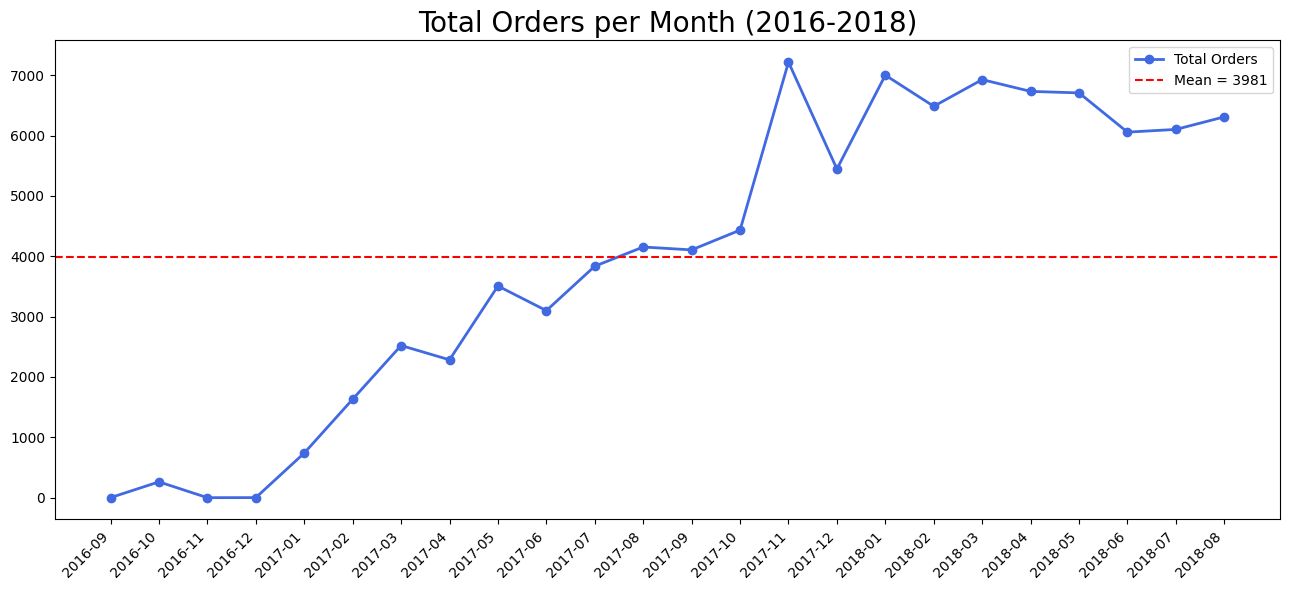

In [69]:
mean_order_total = monthly_orders_df["order_count"].mean()

plt.figure(figsize=(13, 6))
 
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["order_count"],
    marker="o",
    linewidth=2,
    color="royalblue",
    label="Total Orders"
) 

plt.axhline(
    y=mean_order_total,
    color="red",
    linestyle="--",
    linewidth=1.5,
    label=f"Mean = {mean_order_total:.0f}"
)

plt.title("Total Orders per Month (2016-2018)", loc="center", fontsize=20) 
plt.xticks(rotation=45, fontsize=10, ha="right") 
plt.yticks(fontsize=10) 
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

Based on the plot above, it can be seen that sales performance showed an upward trend from September 2016 to August 2018, with the **highest sales peak** occurring in **November 2017**. With an average of around 3981 orders, it is evident that most months after mid-2017 were above the average, indicating a period of strong growth. After the peak in August 2018, sales **gradually declined** until **August 2018**.

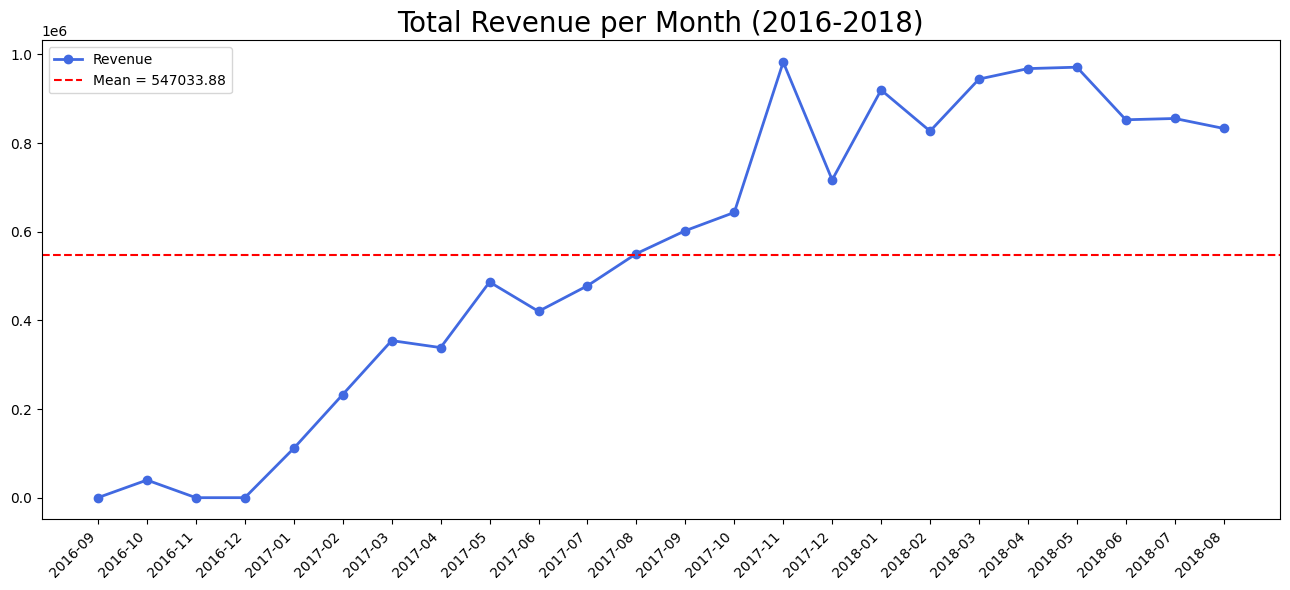

In [70]:
mean_revenue = monthly_orders_df["revenue"].mean()

plt.figure(figsize=(13, 6))

plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["revenue"],
    marker="o",
    linewidth=2,
    color="royalblue",
    label="Revenue"
) 

plt.axhline(
    y=mean_revenue,
    color="red",
    linestyle="--",
    linewidth=1.5,
    label=f"Mean = {mean_revenue:.2f}"
)

plt.title("Total Revenue per Month (2016-2018)", loc="center", fontsize=20) 
plt.xticks(rotation=45, fontsize=10, ha="right") 
plt.yticks(fontsize=10) 
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

Based on the plot above, it can be seen that revenue also increased along with sales, with the **highest revenue** occurring in **November 2017**. Similar to sales, after the peak in August 2018, revenue gradually declined until **August 2018**. The average revenue is 547,033.88, with revenue above the average occurring predominantly from mid-2017 to mid-2018.

### Which product has the highest review score and the most sales? Additionally, how does delivery time impact customer satisfaction?

In [71]:
delivery_analysis_df = all_df.groupby(by="review_score").agg({
    "order_id":"nunique",
    "order_delivery_time":["max","mean", "median", "std"]
})

delivery_analysis_df.columns = ["order_count", "max_time", "mean_time", "median_time", "std_time"]

delivery_analysis_df

,order_count,max_time,mean_time,median_time,std_time
review_score,,,,,
1,9357,196.0,19.526547,15.0,15.188982
2,2927,208.0,15.754947,12.0,12.119462
3,7924,188.0,13.990456,12.0,9.699617
4,18888,195.0,12.168695,11.0,8.237508
5,56637,187.0,10.606625,9.0,6.848375


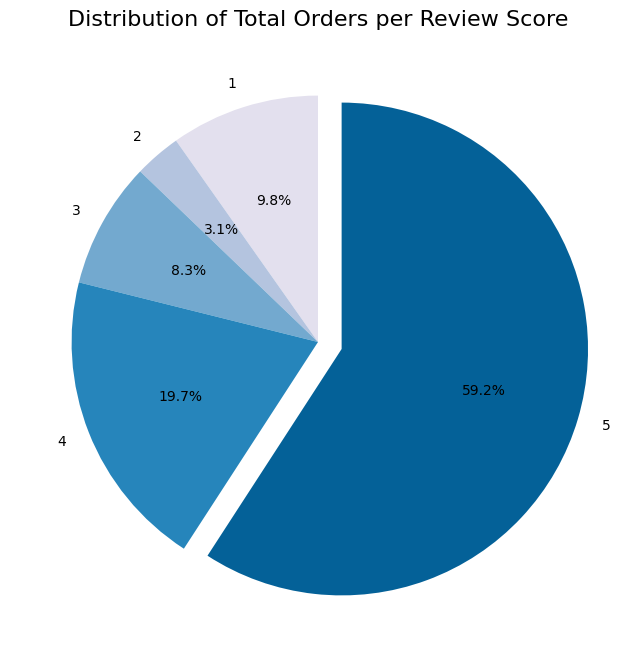

In [72]:
explode = [0.1 if count == delivery_analysis_df['order_count'].max() else 0 for count in delivery_analysis_df['order_count']]

plt.figure(figsize=(8, 8))

delivery_analysis_df['order_count'].plot.pie(
    labels=delivery_analysis_df.index,
    autopct='%1.1f%%',
    colors=sns.color_palette("PuBu", len(delivery_analysis_df)),
    startangle=90,
    explode=explode,
    legend=False
)

plt.title("Distribution of Total Orders per Review Score", fontsize=16)
plt.ylabel('')
plt.show()

From the plot above, it can be seen that **more than 50%** of the orders received a **review score of 5**. Based on this information, we will identify the top 10 most ordered products with the highest review score (score 5).

In [73]:
top_10_product = all_df[all_df['review_score'] == 5].groupby('product_category_name')['order_id'].nunique().nlargest(10)
print(top_10_product)

product_category_name
beleza_saude              5366
cama_mesa_banho           4957
esporte_lazer             4613
informatica_acessorios    3681
moveis_decoracao          3557
utilidades_domesticas     3438
relogios_presentes        3181
brinquedos                2374
automotivo                2200
telefonia                 2183
Name: order_id, dtype: int64


C:\Users\Orlantha\AppData\Local\Temp\ipykernel_5784\53138733.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


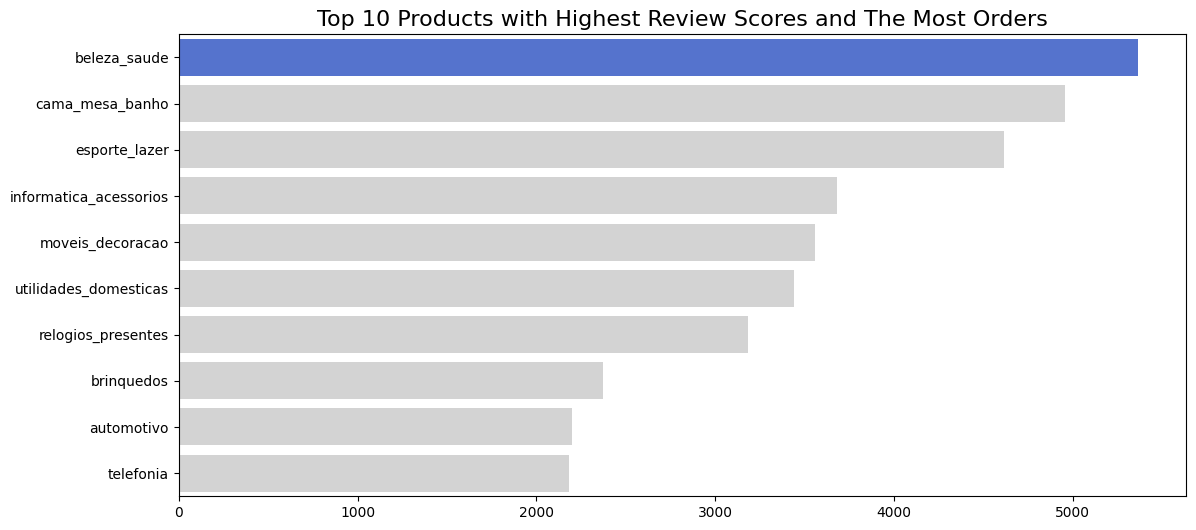

In [74]:
colors_product = ['royalblue' if value == top_10_product.max() else 'lightgrey' for value in top_10_product.values]

plt.figure(figsize=(13,6))

sns.barplot(
    x=top_10_product.values, 
    y=top_10_product.index, 
    palette=colors_product
)

plt.title('Top 10 Products with Highest Review Scores and The Most Orders', fontsize=16)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

From the plot above, it can be seen that the best-selling and most liked product by customers is **beleza saude**. This can impact customer satisfaction in terms of product quality, competitive pricing aligned with the product’s value, complete and accurate product descriptions.

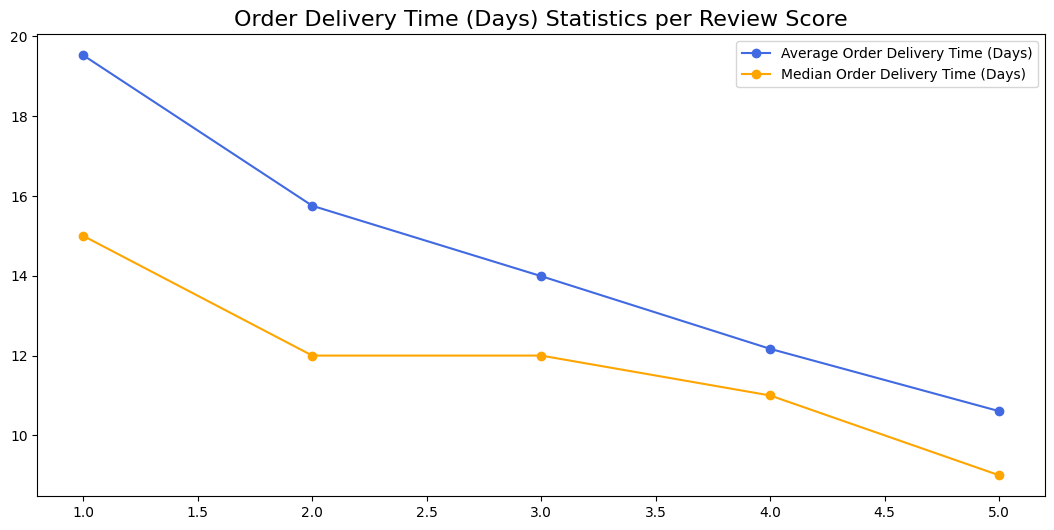

In [75]:
plt.figure(figsize=(13, 6))

# Plot mean delivery time
plt.plot(
    delivery_analysis_df.index,
    delivery_analysis_df["mean_time"],
    marker="o",
    label="Average Order Delivery Time (Days)",
    color="royalblue"
)

# Plot median delivery time
plt.plot(
    delivery_analysis_df.index,
    delivery_analysis_df["median_time"],
    marker="o",
    label="Median Order Delivery Time (Days)",
    color="orange"
)

plt.title("Order Delivery Time (Days) Statistics per Review Score", fontsize=16)
plt.xlabel(None)
plt.ylabel(None)
plt.legend(fontsize=10)
plt.show()

From the plot above, it can also be seen that, aside from the product itself, delivery time can influence customer satisfaction. Customers with **low review scores (1 and 2)** tend to experience **longer delivery times**, averaging **15-20 days**, which may reflect dissatisfaction with their shopping experience. On the other hand, customers with **high review scores (4 and 5)** enjoy **shorter delivery times**, averaging **10-13 days**, highlighting the importance of fast delivery in creating a positive experience.

### How can customers be segmented based on their shopping behavior to develop effective retention strategies?

In [76]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp":"max",   # retrieve the date of the last order
    "order_id":"count",                 # calculate the total number of orders
    "price":"sum"                       # calculate the total revenue generated
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# Calculate the last transaction date of the customer (in days)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288
1,000161a058600d5901f007fab4c27140,1,54.90,409
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378
4,000379cdec625522490c315e70c7a9fb,1,93.00,149


C:\Users\Orlantha\AppData\Local\Temp\ipykernel_5784\577578562.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors_rfm, ax=ax[0])
C:\Users\Orlantha\AppData\Local\Temp\ipykernel_5784\577578562.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors_rfm, ax=ax[1])
C:\Users\Orlantha\AppData\Local\Temp\ipykernel_5784\577578562.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `le

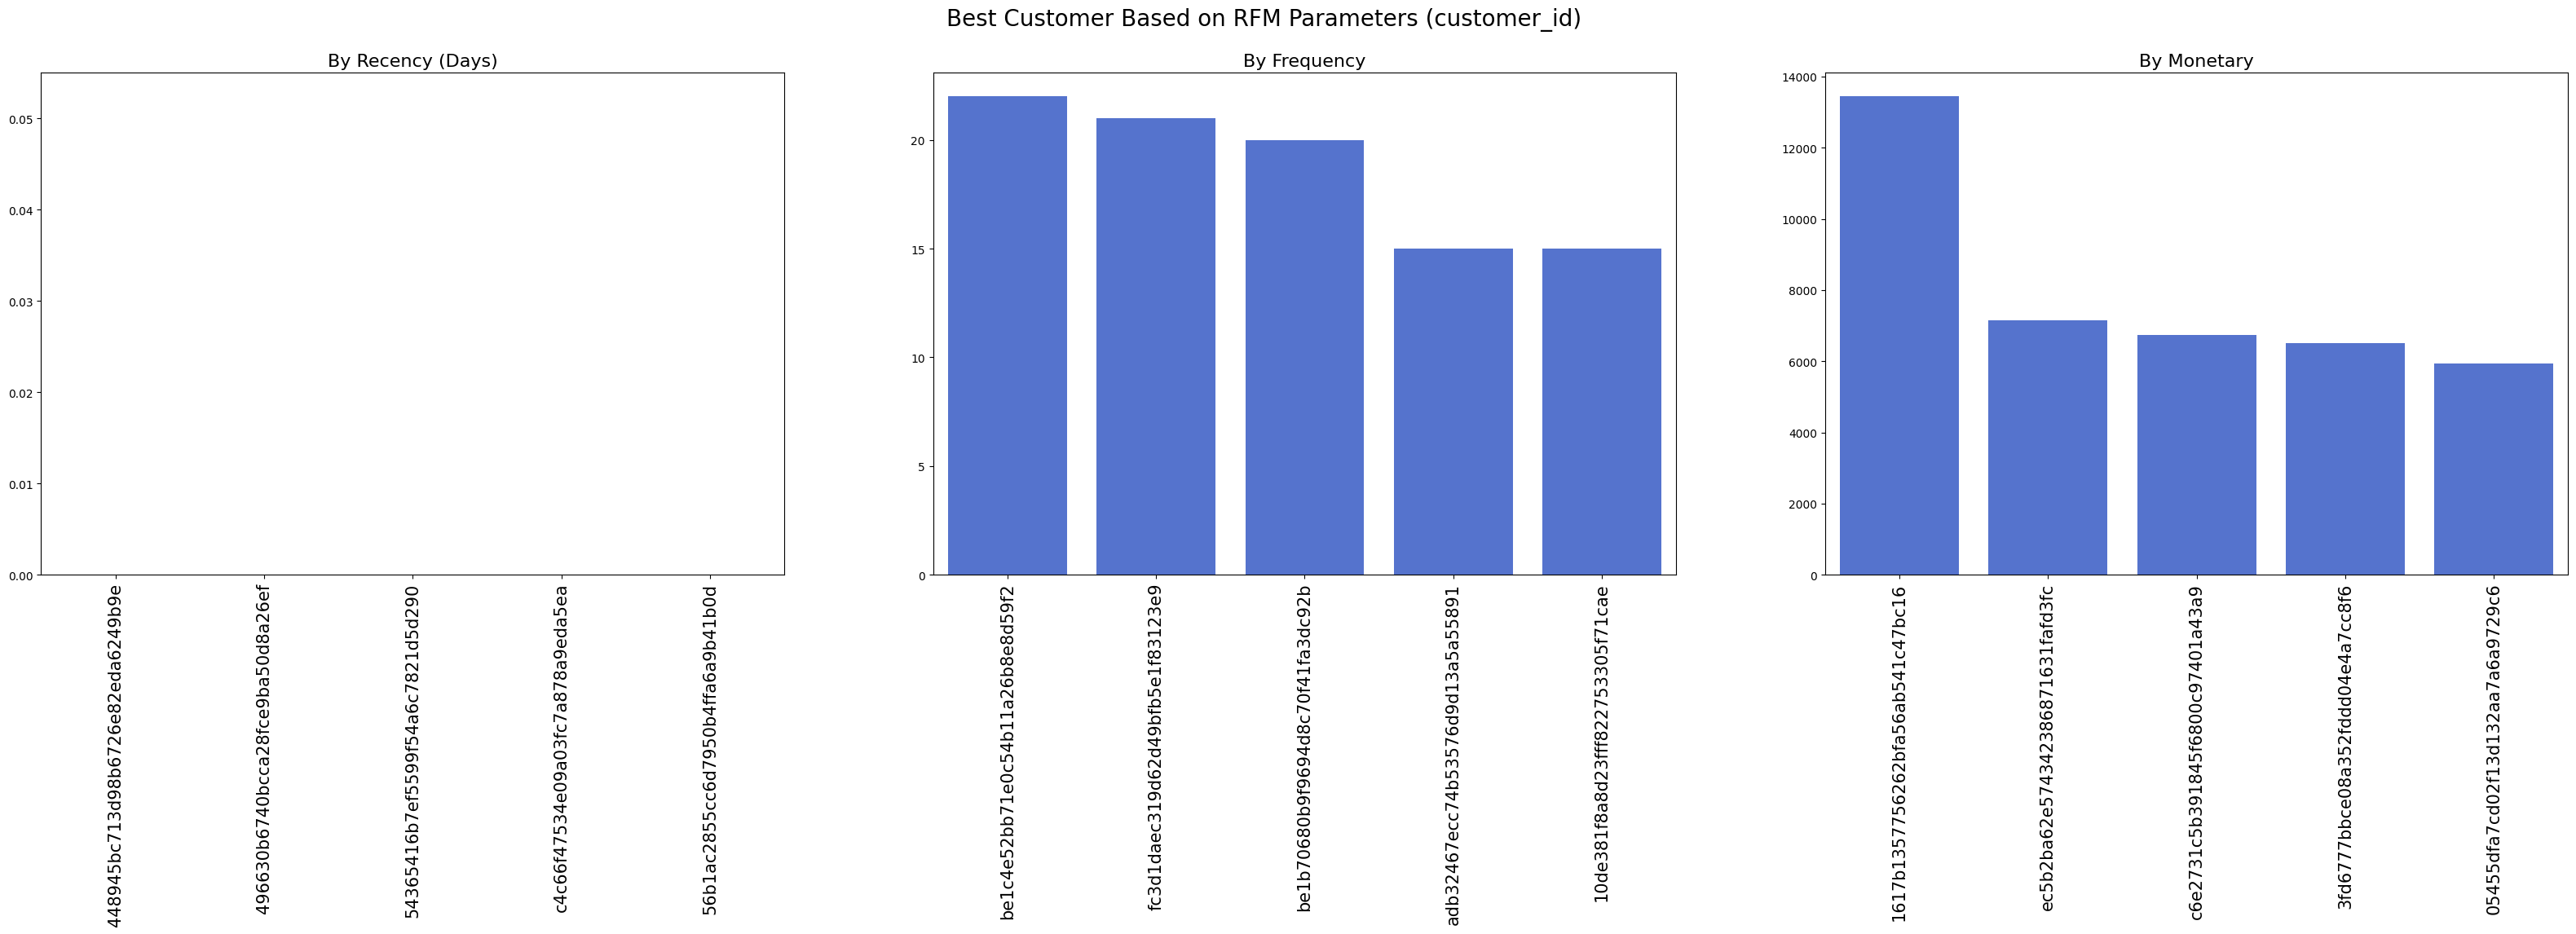

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(40, 8))
 
colors_rfm = ["royalblue"] * 5

# Plot for recency 
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors_rfm, ax=ax[0])
ax[0].set_ylim(0, None)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (Days)", loc="center", fontsize=16)
ax[0].tick_params(axis ='x', labelsize=15, rotation=90)

# Plot for frequency
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors_rfm, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=16)
ax[1].tick_params(axis='x', labelsize=15, rotation=90)

# Plot for monetary
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors_rfm, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=16)
ax[2].tick_params(axis='x', labelsize=15, rotation=90)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

### Which city or state contributes the highest sales and revenue?

In [78]:
orders_location = all_df.groupby(by=["geolocation_state","geolocation_city","geolocation_lat","geolocation_lng"]).agg({
    "order_id":"nunique",
    "price":"sum"
}).reset_index()

orders_location.columns = ["state","city","latitude","longitude","order_count","revenue"]
orders_location.head()

,state,city,latitude,longitude,order_count,revenue
0,AC,brasileia,-11.011463,-68.742003,1,59.70
1,AC,cruzeiro do sul,-7.631108,-72.666706,3,957.79
2,AC,epitaciolandia,-11.025082,-68.740941,1,92.34
3,AC,manoel urbano,-8.833886,-69.259052,1,194.99
4,AC,porto acre,-9.592991,-67.539577,1,74.90


In [79]:
# The city or state with the highest sales and revenue.

highest_orders_city = orders_location.loc[orders_location["order_count"].idxmax()]
highest_revenue_city = orders_location.loc[orders_location["revenue"].idxmax()]

print(f"{highest_orders_city}\n=============================\n{highest_revenue_city}")

state                      RJ
city           rio de janeiro
latitude           -23.011335
longitude          -43.450256
order_count               134
revenue              21636.32
Name: 6811, dtype: object
state                      RJ
city           rio de janeiro
latitude           -23.011335
longitude          -43.450256
order_count               134
revenue              21636.32
Name: 6811, dtype: object


In [80]:
#  Create a map using Folium
m = folium.Map(location=[-14.2350, -51.9253], tiles="OpenStreetMap", zoom_start=4)  # Brazil's center

# Add a marker for each city
for _, row in orders_location.iterrows():
    folium.CircleMarker(
        location=(row["latitude"], row["longitude"]),
        radius=row['order_count'] ** 0.5,  # adjust the marker size based on the number of sales
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=(
            f"<b>{row['city']}</b><br>"
            f"State: {row['state']}<br>"
            f"Total Sales: {row['order_count']}<br>"
            f"Total Revenue: {row['revenue']:.2f}"
        )
    ).add_to(m)

# Highlight the city with the highest sales and revenue
folium.Marker(
    location=(highest_orders_city["latitude"], highest_orders_city["longitude"]),
    popup=(
        f"<b>Highest Sales</b><br>"
        f"City: {highest_orders_city['city']}<br>"
        f"State: {highest_orders_city['state']}<br>"
        f"Total Sales: {highest_orders_city['order_count']}<br>"
        f"Total Revenue: {highest_orders_city['revenue']:.2f}"
    ),
    icon=folium.Icon(color='green')
).add_to(m)

m.save('sales_map.html')
#m  #Remove the comment sign (#) to see the map results

## Conclusion

**Question 1:**  
1. The company's sales performance and revenue over the past two years have shown an increasing trend, with the **highest sales and revenue** peak in **November 2017**. However, both sales and revenue have experienced a **gradual decline** after the peak until **August 2018**.

**Question 2:**  
1. The product with the highest review score (review score=5) and the most sales is **beleza saude**.  
2. Delivery time has a significant impact. Customers with **low review scores (1 and 2)** tend to experience **longer delivery times**, averaging **15-20 days**, which may reflect dissatisfaction with the shopping experience. On the other hand, customers with **high review scores (4 and 5)** enjoy **shorter delivery times**, averaging **10-13 days**, highlighting the importance of fast delivery for creating a positive experience.

**Question 3:**  
Customer segmentation based on shopping behavior can be performed using RFM analysis.  
1. **_Recency_:** The lowest recency indicates customers who have recently made a purchase transaction, such as the top customer with customer_id **448945bc713d98b6726e82eda6249b9e**.  
2. **_Frequency_:** The highest frequency indicates customers who make frequent purchase transactions, such as the customer with customer_id **be1c4e52bb71e0c54b11a26b8e8d59f2**.  
3. **_Monetary_:** The highest monetary indicates customers who contribute significantly to the company's revenue, such as the customer with customer_id **1617b1357756262bfa56ab541c47bc16**.

**Question 4:**  
The highest sales and revenue are located in the city of **Rio de Janeiro** (state RJ) with a **total of 134 sales** and **revenue** generated of **BRL 21,636.32**.